scikit-learn 패키지 설치

pip install --upgrade scikit-learn

In [1]:
import numpy as np
from hossam import load_data
from pandas import DataFrame
from sklearn.impute import SimpleImputer

In [2]:
origin = load_data("ref_sample")
origin

[data] https://data.hossam.kr/data/lab03/ref_sample.xlsx
[desc] 데이터 정제를 위한 실습용 데이터
[!] Cannot read metadata


,kor,eng,math,sic
name,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
민철,NaN,70,83.0,79.0
수현,63.0,60,31.0,71.0
호영,75.0,50,90.0,NaN
영호,80.0,88,91.0,72.0
용식,82.0,88,NaN,90.0
나영,90.0,92,81.0,NaN
석영,91.0,90,89.0,80.0


In [3]:
empty = origin.isnull()
empty

,kor,eng,math,sic
name,,,,
철수,False,False,False,False
영희,False,False,False,False
민철,True,False,False,False
수현,False,False,False,False
호영,False,False,False,True
영호,False,False,False,False
용식,False,False,True,False
나영,False,False,False,True
석영,False,False,False,False


In [4]:
empty.sum()

kor     1
eng     0
math    1
sic     2
dtype: int64

In [5]:
na1 = origin.dropna()
na1

,kor,eng,math,sic
name,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
수현,63.0,60,31.0,71.0
영호,80.0,88,91.0,72.0
석영,91.0,90,89.0,80.0


In [6]:
na2 = origin.dropna(axis=1)
na2

,eng
name,
철수,77
영희,120
민철,70
수현,60
호영,50
영호,88
용식,88
나영,92
석영,90


In [7]:
na3 = origin.dropna(subset = ['kor'])
na3

,kor,eng,math,sic
name,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
수현,63.0,60,31.0,71.0
호영,75.0,50,90.0,NaN
영호,80.0,88,91.0,72.0
용식,82.0,88,NaN,90.0
나영,90.0,92,81.0,NaN
석영,91.0,90,89.0,80.0


고정값 대체

In [9]:
re_df1 = origin.fillna(value=50)
re_df1

,kor,eng,math,sic
name,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
민철,50.0,70,83.0,79.0
수현,63.0,60,31.0,71.0
호영,75.0,50,90.0,50.0
영호,80.0,88,91.0,72.0
용식,82.0,88,50.0,90.0
나영,90.0,92,81.0,50.0
석영,91.0,90,89.0,80.0


통계적 값으로 대체

결측치를 정제할 규칙을 담고 있는 객체 생성
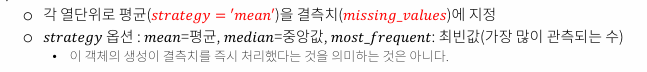

In [10]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [11]:
df_imr = imr.fit_transform(origin.values)
df_imr

array([[ 98.        ,  77.        ,  88.        ,  64.        ],
       [ 88.        , 120.        ,  62.        ,  72.        ],
       [ 83.375     ,  70.        ,  83.        ,  79.        ],
       [ 63.        ,  60.        ,  31.        ,  71.        ],
       [ 75.        ,  50.        ,  90.        ,  75.42857143],
       [ 80.        ,  88.        ,  91.        ,  72.        ],
       [ 82.        ,  88.        ,  76.875     ,  90.        ],
       [ 90.        ,  92.        ,  81.        ,  75.42857143],
       [ 91.        ,  90.        ,  89.        ,  80.        ]])

In [12]:
re_df2 = DataFrame(df_imr,
                    index=origin.index,
                    columns=origin.columns
                    )
re_df2

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,120.0,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


연습문제 - 상점 판매 데이터 정제 첼린지
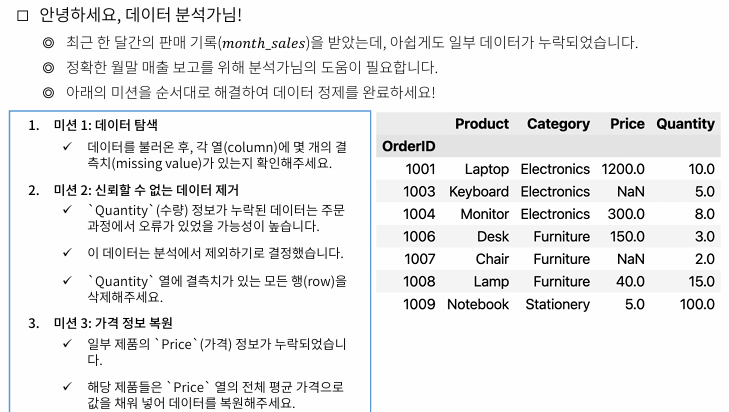

In [13]:
# 미션 1 데이터 탐색
origin = load_data("month_sales")
origin.head()

[data] https://data.hossam.kr/data/lab03/month_sales.xlsx
[desc] 데이터 정제(결측치 처리) 연습문제용 데이터

field     description
--------  -------------
OrderID   주문번호
Product   상품명
Category  상품 카테고리
Price     단가
Quantity  주문 수량



,Product,Category,Price,Quantity
OrderID,,,,
1001,Laptop,Electronics,1200.0,10.0
1002,Mouse,Electronics,25.0,NaN
1003,Keyboard,Electronics,NaN,5.0
1004,Monitor,Electronics,300.0,8.0
1005,Webcam,Electronics,80.0,NaN


In [14]:
na = origin.isnull()
na.sum()

Product     0
Category    0
Price       2
Quantity    3
dtype: int64

In [15]:
#미션 2: 신뢰할 수 없는 데이터 제거
cleaned = origin.copy()
cleaned = cleaned.dropna(subset=['Quantity'])
cleaned

,Product,Category,Price,Quantity
OrderID,,,,
1001,Laptop,Electronics,1200.0,10.0
1003,Keyboard,Electronics,NaN,5.0
1004,Monitor,Electronics,300.0,8.0
1006,Desk,Furniture,150.0,3.0
1007,Chair,Furniture,NaN,2.0
1008,Lamp,Furniture,40.0,15.0
1009,Notebook,Stationery,5.0,100.0


In [51]:
# 미션 3 : 가격 정보 복원
imr2 = SimpleImputer(missing_values=np.nan, strategy='mean')
# imr2
# price_na = cleaned[cleaned['Price'].isnull()].copy()
# price_na
price_imr = imr2.fit_transform(cleaned[['Price']])
# price_imr
cleaned['Price'] = price_imr
cleaned

,Product,Category,Price,Quantity
OrderID,,,,
1001,Laptop,Electronics,1200.0,10.0
1003,Keyboard,Electronics,339.0,5.0
1004,Monitor,Electronics,300.0,8.0
1006,Desk,Furniture,150.0,3.0
1007,Chair,Furniture,339.0,2.0
1008,Lamp,Furniture,40.0,15.0
1009,Notebook,Stationery,5.0,100.0


In [58]:
import pandas as pd
data = pd.read_csv('../data/서울특별시_전월세가_2024.csv', encoding='euc-kr')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522001 entries, 0 to 522000
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   접수년도     522001 non-null  int64  
 1   자치구코드    522001 non-null  int64  
 2   자치구명     522001 non-null  object 
 3   법정동코드    522001 non-null  int64  
 4   법정동명     522001 non-null  object 
 5   지번구분코드   399019 non-null  float64
 6   지번구분     399019 non-null  object 
 7   본번       399090 non-null  float64
 8   부번       399090 non-null  float64
 9   층        399022 non-null  float64
 10  계약일      522001 non-null  int64  
 11  전월세구분    521992 non-null  object 
 12  임대면적     522001 non-null  float64
 13  보증금(만원)  522001 non-null  int64  
 14  임대료(만원)  522001 non-null  int64  
 15  건물명      399049 non-null  object 
 16  건축년도     484228 non-null  float64
 17  건물용도     522001 non-null  object 
 18  계약기간     497472 non-null  object 
 19  신규계약구분   498452 non-null  object 
 20  갱신청구권사용  32439 non-null   

In [59]:
data.isnull().sum()

접수년도            0
자치구코드           0
자치구명            0
법정동코드           0
법정동명            0
지번구분코드     122982
지번구분       122982
본번         122911
부번         122911
층          122979
계약일             0
전월세구분           9
임대면적            0
보증금(만원)         0
임대료(만원)         0
건물명        122952
건축년도        37773
건물용도            0
계약기간        24529
신규계약구분      23549
갱신청구권사용    489562
종전보증금      360429
종전임대료      446766
dtype: int64